Classes d’activités physiques de personnes : 

(1) marcher

(2) monter les escaliers

(3) descendre les escaliers

(4) s’asseoir

(5) se lever

(6) s’allonger

# **Librairies**

In [ ]:
!pip install coclust
!pip install fuzzy-c-means
!pip install scikit-learn==0.22.2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from fcmeans import FCM
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from coclust.evaluation.external import accuracy
from tabulate import tabulate

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [ ]:
# fonction pour visuelaiser les clusters
def eval_clustering_2D(X_reduced, labels_true, labels_pred):

  print('\nAccuracy : ', round(accuracy(labels_true, labels_pred), 2))
  print('NMI : ', round(normalized_mutual_info_score(labels_true, labels_pred), 2))
  print('ARI : ', round(adjusted_rand_score(labels_true, labels_pred), 2))

  color = ['red', 'blue', 'green', 'yellow', 'purple', 'brown', 'gray', 'pink', 'black']

  fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey='row')

  for i in set(labels_pred.tolist()):
    axes[0].scatter(X_reduced[labels_pred == i, 0], X_reduced[labels_pred == i, 1], s = 50, c = color[i], label = 'Cluster ' + str(i))
  axes[0].set_title("predicted labels")
  axes[0].legend()

  for i in set(labels_true.tolist()):
    axes[1].scatter(X_reduced[labels_true == i, 0], X_reduced[labels_true == i, 1], s = 50, c = color[i], label = 'Cluster ' + str(i))
  axes[1].set_title("true labels")
  axes[1].legend()

  plt.show()

# **Dataset**

In [ ]:
chemin = "/content/drive/MyDrive/Colab Notebooks/M2_MLSD/Apprentissage_non_supervise/dataset/"

t_accm_x = pd.read_csv(chemin + 'accm_x.txt', sep=" ", header=None)
t_accm_y = pd.read_csv(chemin + 'accm_y.txt', sep=" ", header=None)
t_accm_z = pd.read_csv(chemin + 'accm_z.txt', sep=" ", header=None)
t_acce_x = pd.read_csv(chemin + 'acce_x.txt', sep=" ", header=None)
t_acce_y = pd.read_csv(chemin + 'acce_y.txt', sep=" ", header=None)
t_acce_z = pd.read_csv(chemin + 'acce_z.txt', sep=" ", header=None)
t_vit_x = pd.read_csv(chemin + 'vit_x.txt', sep=" ", header=None)
t_vit_y = pd.read_csv(chemin + 'vit_y.txt', sep=" ", header=None)
t_vit_z = pd.read_csv(chemin + 'vit_z.txt', sep=" ", header=None)
lab = pd.read_csv(chemin + 'lab.txt', sep=" ", header=None)
lab.columns = ['label']

### **Accélération mesurée**

In [ ]:
t_accm_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,1.012817,1.022833,1.022028,1.017877,1.023680,1.016974,1.017746,1.019263,1.016417,1.020745,1.018643,1.019521,1.020260,1.018041,1.020829,1.018644,1.019398,1.020399,1.019222,1.022093,1.020433,1.020534,1.021503,1.019931,1.020480,1.018945,1.019238,1.019989,1.018917,1.019762,1.019021,1.017887,1.018136,1.019543,1.020242,1.018757,1.019534,1.019862,1.019060,1.020717,...,1.019462,1.020433,1.021189,1.021903,1.021936,1.020550,1.018878,1.018548,1.017389,1.015021,1.019310,1.024606,1.021863,1.020201,1.020573,1.018729,1.019360,1.019954,1.018969,1.019633,1.019553,1.019179,1.019695,1.019145,1.018516,1.017926,1.017780,1.018917,1.020606,1.022583,1.020981,1.018065,1.019638,1.020017,1.018766,1.019815,1.019290,1.018445,1.019372,1.021171
1,1.018851,1.022380,1.020781,1.020218,1.021344,1.020522,1.019790,1.019216,1.018307,1.017996,1.017932,1.018121,1.018305,1.018458,1.018201,1.017129,1.017814,1.018800,1.017601,1.017970,1.018489,1.017787,1.019167,1.019789,1.019462,1.020433,1.021189,1.021903,1.021936,1.020550,1.018878,1.018548,1.017389,1.015021,1.019310,1.024606,1.021863,1.020201,1.020573,1.018729,...,1.017997,1.017391,1.017994,1.021661,1.022348,1.020336,1.019066,1.018882,1.020013,1.018262,1.017474,1.018954,1.019628,1.022794,1.024238,1.022783,1.020487,1.018146,1.019779,1.019922,1.018709,1.019980,1.019301,1.019243,1.020169,1.020892,1.022771,1.021553,1.019811,1.020246,1.019291,1.019258,1.020736,1.020950,1.020491,1.018685,1.015660,1.014788,1.016499,1.017849
2,1.023127,1.021882,1.019178,1.015861,1.012893,1.016451,1.020331,1.020266,1.021759,1.018649,1.013117,1.016167,1.018977,1.016653,1.017782,1.020528,1.021877,1.022096,1.020731,1.020761,1.020405,1.020213,1.021675,1.019989,1.017997,1.017391,1.017994,1.021661,1.022348,1.020336,1.019066,1.018882,1.020013,1.018262,1.017474,1.018954,1.019628,1.022794,1.024238,1.022783,...,1.021580,1.022957,1.022148,1.021799,1.022725,1.021780,1.020903,1.019081,1.017221,1.019547,1.021770,1.022134,1.020713,1.018487,1.020331,1.024399,1.026768,1.023704,1.016694,1.014855,1.017545,1.022063,1.026897,1.025257,1.022442,1.022451,1.020104,1.020140,1.020892,1.018699,1.020304,1.021516,1.019417,1.019312,1.019448,1.019434,1.019916,1.021041,1.022935,1.022019
3,1.017682,1.018149,1.019854,1.019880,1.019121,1.020479,1.020595,1.016340,1.010611,1.009013,1.015016,1.024026,1.027664,1.022425,1.015007,1.014774,1.017851,1.019387,1.021093,1.022092,1.024232,1.025311,1.022033,1.020125,1.021580,1.022957,1.022148,1.021799,1.022725,1.021780,1.020903,1.019081,1.017221,1.019547,1.021770,1.022134,1.020713,1.018487,1.020331,1.024399,...,1.021936,1.022134,1.020409,1.018856,1.019397,1.020827,1.020824,1.020529,1.019106,1.017155,1.017490,1.018337,1.018905,1.018994,1.018260,1.018166,1.018076,1.019054,1.020879,1.020772,1.019931,1.019357,1.020142,1.021285,1.019640,1.018241,1.018862,1.019617,1.019715,1.019507,1.021295,1.022934,1.022183,1.021637,1.020598,1.018887,1.019161,1.019916,1.019602,1.020735
4,1.019952,1.019616,1.020933,1.023061,1.022242,1.020867,1.021939,1.022300,1.022302,1.022254,1.021854,1.021550,1.020452,1.020845,1.022117,1.022010,1.021345,1.019568,1.018964,1.019953,1.020229,1.021055,1.021071,1.020661,1.021936,1.022134,1.020409,1.018856,1.019397,1.020827,1.020824,1.020529,1.019106,1.017155,1.017490,1.018337,1.018905,1.018994,1.018260,1.018166,...,1.019428,1.022263,1.021587,1.020767,1.017805,1.017798,1.021836,1.023378,1.024073,1.022197,1.020102,1.021246,1.022246,1.022881,1.021635,1.020924,1.019791,1.016090,1.016643,1.018899,1.020067,1.021257,1.020614,1.019587,1.017337,1.016364,1.018771,1.020942,1.021323,1.020792,1.022687,1.023670,1.019899,1.017381,1.020389,1.023884,1.021753,1.019425,1.018896,1.016787


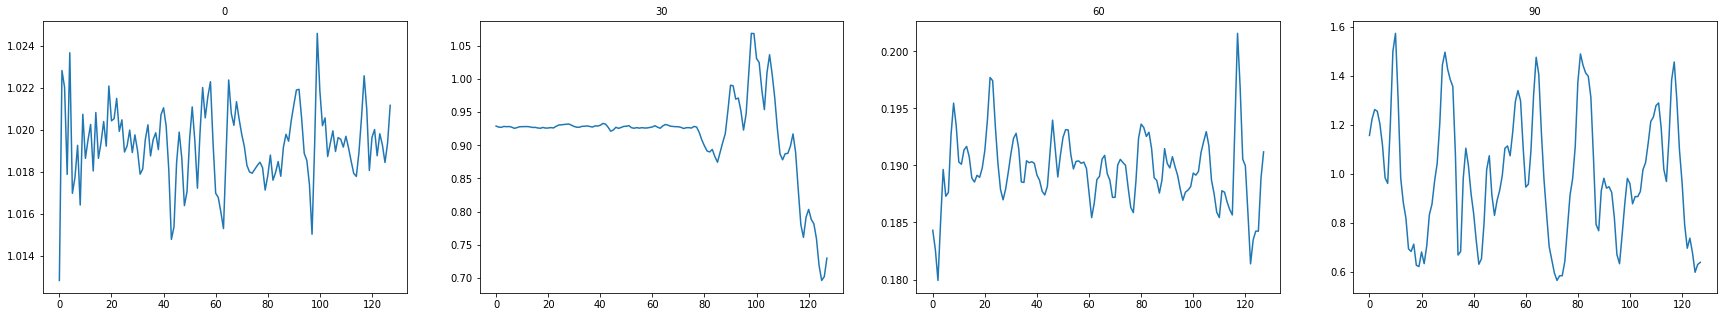

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 5))

for row, ax in zip(t_accm_x.index, axes.flatten()):
    row = row*30
    ax.plot(t_accm_x.loc[row].values)
    ax.set_title(row, fontsize=10)
plt.show()

In [ ]:
t_accm_y.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,-0.123217,-0.126876,-0.124004,-0.124928,-0.125767,-0.124462,-0.127361,-0.127891,-0.125868,-0.124368,-0.123138,-0.121334,-0.118358,-0.120062,-0.122119,-0.120080,-0.120902,-0.121395,-0.121568,-0.124681,-0.125490,-0.124935,-0.124906,-0.124993,-0.125155,-0.124798,-0.125479,-0.126807,-0.127289,-0.123713,-0.119263,-0.122697,-0.127122,-0.126278,-0.126142,-0.125169,-0.121594,-0.119056,-0.117913,-0.117403,...,-0.122158,-0.123397,-0.127263,-0.130238,-0.131286,-0.130000,-0.127771,-0.123909,-0.119738,-0.121468,-0.126012,-0.128220,-0.126367,-0.121747,-0.121880,-0.123966,-0.124257,-0.126150,-0.127650,-0.129588,-0.130348,-0.129979,-0.132165,-0.128870,-0.124246,-0.126746,-0.127045,-0.125637,-0.126780,-0.125855,-0.123493,-0.121994,-0.123910,-0.127970,-0.128295,-0.127010,-0.126185,-0.124070,-0.122745,-0.121326
1,-0.123976,-0.126808,-0.127786,-0.126655,-0.123634,-0.124919,-0.124301,-0.119798,-0.119222,-0.120174,-0.121316,-0.122291,-0.126494,-0.132631,-0.128624,-0.122015,-0.121854,-0.121211,-0.120603,-0.120948,-0.121218,-0.123681,-0.125553,-0.124199,-0.122158,-0.123397,-0.127263,-0.130238,-0.131286,-0.130000,-0.127771,-0.123909,-0.119738,-0.121468,-0.126012,-0.128220,-0.126367,-0.121747,-0.121880,-0.123966,...,-0.117351,-0.117708,-0.120567,-0.121626,-0.120834,-0.121511,-0.120537,-0.122659,-0.125076,-0.123420,-0.119909,-0.113072,-0.112683,-0.118773,-0.123633,-0.128660,-0.121679,-0.108560,-0.108818,-0.111929,-0.113335,-0.118398,-0.120435,-0.119145,-0.117269,-0.115695,-0.114043,-0.111686,-0.112778,-0.115743,-0.117672,-0.119885,-0.122055,-0.122978,-0.122969,-0.127339,-0.132329,-0.129027,-0.126424,-0.130519
2,-0.120016,-0.121499,-0.122841,-0.123717,-0.123817,-0.121304,-0.121258,-0.125411,-0.129458,-0.129856,-0.127783,-0.125683,-0.121083,-0.117871,-0.118179,-0.117495,-0.117420,-0.116524,-0.116636,-0.120972,-0.125692,-0.129232,-0.126144,-0.119488,-0.117351,-0.117708,-0.120567,-0.121626,-0.120834,-0.121511,-0.120537,-0.122659,-0.125076,-0.123420,-0.119909,-0.113072,-0.112683,-0.118773,-0.123633,-0.128660,...,-0.131393,-0.130453,-0.131171,-0.129933,-0.129450,-0.129804,-0.129180,-0.131421,-0.130716,-0.129749,-0.131428,-0.130043,-0.129670,-0.126487,-0.121685,-0.123728,-0.125686,-0.126648,-0.129585,-0.130562,-0.130751,-0.132542,-0.133325,-0.130517,-0.127259,-0.127273,-0.128325,-0.128341,-0.131299,-0.135513,-0.134438,-0.133090,-0.134369,-0.133016,-0.130937,-0.130473,-0.130305,-0.130876,-0.131210,-0.130183
3,-0.133404,-0.134364,-0.135203,-0.134048,-0.130632,-0.123746,-0.118772,-0.122888,-0.127193,-0.126323,-0.127280,-0.128284,-0.126820,-0.123751,-0.118452,-0.116749,-0.119566,-0.122615,-0.127409,-0.132999,-0.137142,-0.137056,-0.132648,-0.131305,-0.131393,-0.130453,-0.131171,-0.129933,-0.129450,-0.129804,-0.129180,-0.131421,-0.130716,-0.129749,-0.131428,-0.130043,-0.129670,-0.126487,-0.121685,-0.123728,...,-0.129600,-0.130723,-0.130925,-0.130051,-0.132337,-0.137606,-0.143545,-0.141507,-0.135970,-0.135658,-0.132345,-0.128695,-0.129707,-0.129693,-0.131397,-0.133899,-0.135654,-0.137265,-0.135319,-0.134463,-0.132504,-0.128881,-0.130835,-0.131154,-0.129785,-0.130892,-0.129341,-0.128031,-0.128397,-0.128371,-0.127894,-0.127629,-0.129888,-0.130819,-0.128451,-0.126481,-0.127507,-0.131986,-0.134507,-0.133316
4,-0.128731,-0.127846,-0.128230,-0.129854,-0.132752,-0.133991,-0.131159,-0.129970,-0.131889,-0.133298,-0.134566,-0.134545,-0.132740,-0.130512,-0.129979,-0.131008,-0.130450,-0.130911,-0.133531,-0.134933,-0.133370,-0.130811,-0.131721,-0.131759,-0.129600,-0.130723,-0.130925,-0.130051,-0.132337,-0.137606,-0.143545,-0.141507,-0.135970,-0.135658,-0.132345,-0.128695,-0.129707,-0.129693,-0.131397,-0.133899,...,-0.132685,-0.133022,-0.132084,-0.128511,-0.122917,-0.124986,-0.129536,-0.130391,-0.130591,-0.126080,-0.1231

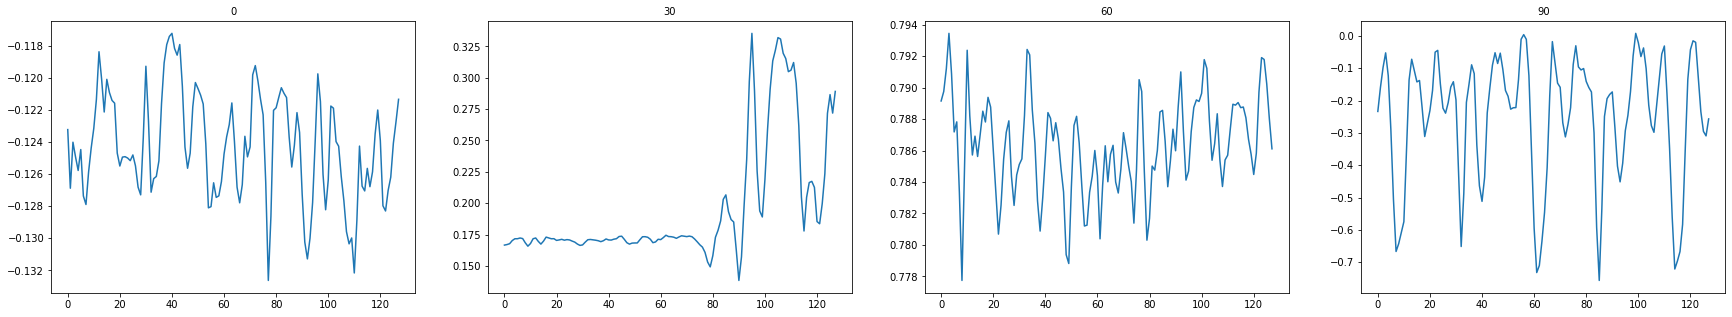

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 5))

for row, ax in zip(t_accm_y.index, axes.flatten()):
    row = row*30
    ax.plot(t_accm_y.loc[row].values)
    ax.set_title(row, fontsize=10)
plt.show()

In [ ]:
t_accm_z.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0.102934,0.105687,0.102102,0.106553,0.102814,0.107493,0.109386,0.103886,0.102473,0.097566,0.097647,0.095374,0.093671,0.099219,0.099974,0.098896,0.096283,0.097658,0.100441,0.098470,0.101570,0.102106,0.100515,0.102114,0.100956,0.101477,0.101430,0.100086,0.099809,0.097432,0.095205,0.093691,0.094352,0.095953,0.098660,0.104984,0.106625,0.106414,0.109485,0.107602,...,0.101472,0.101226,0.102653,0.101608,0.100634,0.096142,0.090326,0.089905,0.093117,0.095741,0.094250,0.094481,0.097755,0.099002,0.098523,0.095429,0.094212,0.097735,0.102188,0.103457,0.099610,0.097589,0.098616,0.097882,0.096877,0.097010,0.097582,0.097073,0.097425,0.099341,0.100058,0.098564,0.093177,0.088742,0.090505,0.094843,0.098350,0.100385,0.099874,0.094987
1,0.097930,0.099351,0.098114,0.097517,0.097472,0.096577,0.097741,0.097309,0.098159,0.101166,0.101621,0.101573,0.101167,0.101360,0.101138,0.099238,0.100581,0.102503,0.100168,0.098597,0.100780,0.100360,0.099200,0.101714,0.101472,0.101226,0.102653,0.101608,0.100634,0.096142,0.090326,0.089905,0.093117,0.095741,0.094250,0.094481,0.097755,0.099002,0.098523,0.095429,...,0.097527,0.097369,0.098893,0.100536,0.098083,0.097308,0.101762,0.105788,0.104529,0.101473,0.096284,0.087116,0.088206,0.096796,0.096812,0.098964,0.104573,0.103425,0.100734,0.097965,0.099716,0.104411,0.103337,0.103670,0.103047,0.099247,0.100684,0.100973,0.097971,0.095684,0.094537,0.098759,0.101977,0.095360,0.089466,0.095126,0.099496,0.093535,0.089035,0.090612
2,0.091117,0.092676,0.096064,0.099897,0.097627,0.088291,0.082241,0.081100,0.081295,0.081927,0.087546,0.093742,0.091054,0.088174,0.088614,0.092007,0.098059,0.095428,0.092488,0.095635,0.094342,0.094213,0.096955,0.097297,0.097527,0.097369,0.098893,0.100536,0.098083,0.097308,0.101762,0.105788,0.104529,0.101473,0.096284,0.087116,0.088206,0.096796,0.096812,0.098964,...,0.093599,0.089887,0.083149,0.085446,0.089210,0.092701,0.095387,0.093006,0.089667,0.085096,0.084867,0.090206,0.091938,0.094822,0.096023,0.093216,0.096160,0.096263,0.093678,0.096380,0.093724,0.087680,0.085679,0.086568,0.090691,0.092891,0.093875,0.094094,0.087741,0.082867,0.085343,0.087155,0.084546,0.082166,0.081972,0.081413,0.081936,0.083011,0.082334,0.081487
3,0.095152,0.095415,0.088274,0.086325,0.088411,0.088929,0.091691,0.093365,0.096477,0.098737,0.095654,0.093673,0.091236,0.092072,0.097276,0.097218,0.095117,0.093188,0.091171,0.088349,0.082912,0.084178,0.088934,0.090590,0.093599,0.089887,0.083149,0.085446,0.089210,0.092701,0.095387,0.093006,0.089667,0.085096,0.084867,0.090206,0.091938,0.094822,0.096023,0.093216,...,0.082965,0.081726,0.085902,0.088833,0.086746,0.084692,0.082640,0.084150,0.085247,0.083578,0.083925,0.087735,0.092079,0.090971,0.088221,0.087130,0.084942,0.082944,0.079419,0.076888,0.080105,0.084625,0.087186,0.087998,0.087082,0.085528,0.085230,0.088954,0.093179,0.091213,0.088112,0.087322,0.083738,0.082701,0.084490,0.082785,0.084084,0.085761,0.083275,0.081404
4,0.080841,0.079127,0.078291,0.084063,0.089450,0.089304,0.090460,0.088985,0.087994,0.088165,0.084282,0.082178,0.078696,0.082227,0.092075,0.090710,0.089439,0.089907,0.084759,0.082100,0.082830,0.083372,0.081166,0.081556,0.082965,0.081726,0.085902,0.088833,0.086746,0.084692,0.082640,0.084150,0.085247,0.083578,0.083925,0.087735,0.092079,0.090971,0.088221,0.087130,...,0.084108,0.083109,0.080163,0.076622,0.078279,0.084254,0.085648,0.081490,0.084675,0.088211,0.086471,0.087503,0.082953,0.079125,0.084738,0.087178,0.085370,0.084911,0.090154,0.093388,0.083022,0.074595,0.079912,0.085177,0.082895,0.084075,0.085648,0.082100,0.086196,0.089715,0.088028,0.090312,0.088713,0.086957,0.086522,0.081640,0.079652,0.081329,0.085397,0.088816


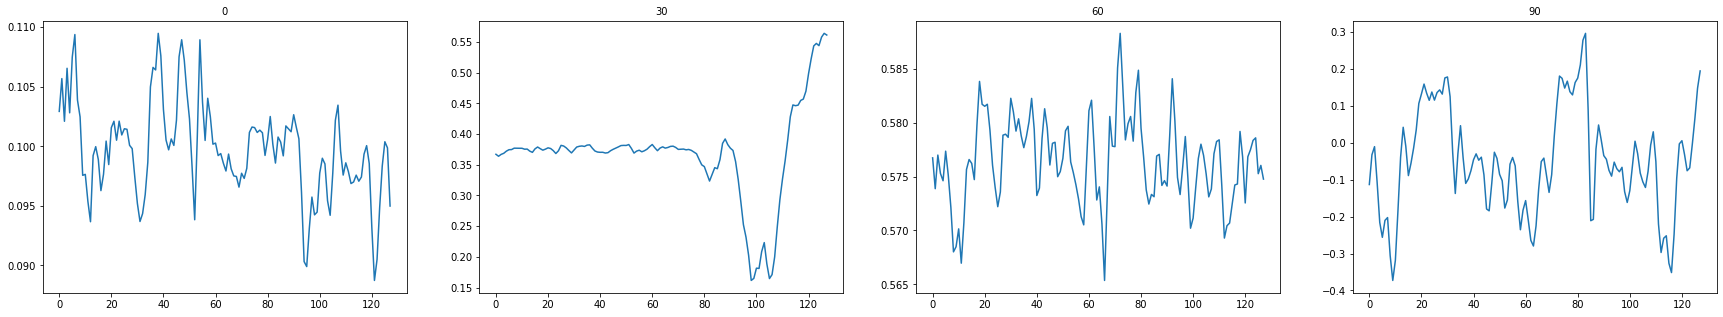

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 5))

for row, ax in zip(t_accm_z.index, axes.flatten()):
    row = row*30
    ax.plot(t_accm_z.loc[row].values)
    ax.set_title(row, fontsize=10)
plt.show()

### **Accélération estimée**

In [ ]:
t_acce_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,0.005407,0.006221,0.006895,0.004610,0.007331,0.005078,0.005763,0.006693,0.005443,0.008241,0.006506,0.006532,0.007422,0.005772,0.006240,0.004623,0.004833,0.005499,0.004341,0.005098,0.004269,0.003045,0.003204,0.004520,0.005127,0.003550,0.004234,0.004469,0.003573,0.005136,...,0.000389,0.001328,0.002053,0.002738,0.002743,0.001330,-0.000367,-0.000722,-0.001904,-0.004294,-0.000025,0.005251,0.002490,0.000811,0.001166,-0.000693,-0.000077,0.000504,-0.000495,0.000156,0.000065,-0.000320,0.000185,-0.000375,-0.001013,-0.001611,-0.001765,-0.000636,0.001047,0.003019,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,-0.000487,-0.000356,-0.000229,-0.000131,-0.000441,-0.001565,-0.000929,0.000009,-0.001236,-0.000911,-0.000435,-0.001177,0.000165,0.000751,0.000389,0.001328,0.002053,0.002738,0.002743,0.001330,-0.000367,-0.000722,-0.001904,-0.004294,-0.000025,0.005251,0.002490,0.000811,0.001166,-0.000693,...,-0.001506,-0.002105,-0.001494,0.002181,0.002876,0.000871,-0.000392,-0.000569,0.000569,-0.001176,-0.001957,-0.000471,0.000208,0.003380,0.004829,0.003380,0.001088,-0.001249,0.000387,0.000533,-0.000679,0.000594,-0.000084,-0.000142,0.000784,0.001507,0.003386,0.002166,0.000422,0.000854,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,-0.006476,-0.003423,-0.000610,-0.002929,-0.001796,0.000956,0.002311,0.002538,0.001180,0.001217,0.000869,0.000686,0.002156,0.000478,-0.001506,-0.002105,-0.001494,0.002181,0.002876,0.000871,-0.000392,-0.000569,0.000569,-0.001176,-0.001957,-0.000471,0.000208,0.003380,0.004829,0.003380,...,0.002138,0.003519,0.002715,0.002370,0.003299,0.002357,0.001481,-0.000340,-0.002201,0.000124,0.002345,0.002706,0.001281,-0.000949,0.000890,0.004952,0.007315,0.004242,-0.002776,-0.004625,-0.001945,0.002561,0.007382,0.005730,0.002901,0.002896,0.000533,0.000552,0.001286,-0.000926,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,-0.004482,0.004528,0.008167,0.002929,-0.004487,-0.004717,-0.001637,-0.000097,0.001614,0.002619,0.004765,0.005851,0.002579,0.000677,0.002138,0.003519,0.002715,0.002370,0.003299,0.002357,0.001481,-0.000340,-0.002201,0.000124,0.002345,0.002706,0.001281,-0.000949,0.000890,0.004952,...,0.001470,0.001644,-0.000106,-0.001683,-0.001165,0.000241,0.000216,-0.000102,-0.001546,-0.003518,-0.003204,-0.002376,-0.001825,-0.001754,-0.002504,-0.002612,-0.002715,-0.001748,0.000066,-0.000050,-0.000898,-0.001478,-0.000698,0.000441,-0.001206,-0.002607,-0.001986,-0.001230,-0.001129,-0.001334,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,0.001750,0.001420,0.000297,0.000665,0.001911,0.001778,0.001087,-0.000716,-0.001347,-0.000384,-0.000135,0.000666,0.000656,0.000221,0.001470,0.001644,-0.000106,-0.001683,-0.001165,0.000241,0.000216,-0.000102,-0.001546,-0.003518,-0.003204,-0.002376,-0.001825,-0.001754,-0.002504,-0.002612,...,-0.001015,0.001832,0.001169,0.000362,-0.002587,-0.002581,0.001470,0.003026,0.003734,0.001870,-0.000212,0.000945,0.001956,0.002602,0.001366,0.000665,-0.000459,-0.004151,-0.003591,-0.001328,-0.000153,0.001043,0.000407,-0.000614,-0.002858,-0.003824,-0.001411,0.000765,0.001153,0.000627,0.002529,0.003518,-0.000248,-0.002761,

In [ ]:
t_acce_y.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0.010767,0.006579,0.008929,0.007489,0.006141,0.006944,0.003552,0.002537,0.004085,0.005118,0.005892,0.007250,0.009791,0.007661,0.005189,0.006823,0.005607,0.004730,0.004183,0.000707,-0.000454,-0.000241,-0.000544,-0.000950,-0.001421,-0.001362,-0.002329,-0.003931,-0.004676,-0.001352,0.002858,-0.000805,-0.005448,-0.004810,-0.004869,-0.004080,-0.000679,0.001696,0.002687,0.003054,...,-0.001193,-0.002342,-0.006117,-0.009001,-0.009958,-0.008580,-0.006260,-0.002305,0.001959,0.000322,-0.004128,-0.006243,-0.004297,0.000415,0.000375,-0.001618,-0.001818,-0.003621,-0.005031,-0.006880,-0.007551,-0.007096,-0.009193,-0.005811,-0.001100,-0.003513,-0.003725,-0.002231,-0.003287,-0.002276,0.000172,0.001756,-0.000076,-0.004053,-0.004295,-0.002929,-0.002023,0.000171,0.001574,0.003070
1,-0.004688,-0.007488,-0.008430,-0.007258,-0.004191,-0.005426,-0.004753,-0.000193,0.000445,-0.000441,-0.001515,-0.002419,-0.006549,-0.012610,-0.008526,-0.001837,-0.001594,-0.000866,-0.000173,-0.000430,-0.000612,-0.002986,-0.004769,-0.003324,-0.001193,-0.002342,-0.006117,-0.009001,-0.009958,-0.008580,-0.006260,-0.002305,0.001959,0.000322,-0.004128,-0.006243,-0.004297,0.000415,0.000375,-0.001618,...,0.008191,0.007841,0.004984,0.003925,0.004712,0.004027,0.004990,0.002853,0.000418,0.002053,0.005540,0.012350,0.012709,0.006585,0.001689,-0.003378,0.003560,0.016634,0.016326,0.013163,0.011702,0.006579,0.004479,0.005702,0.007506,0.009006,0.010581,0.012856,0.011679,0.008625,0.006604,0.004295,0.002025,0.001000,0.000904,-0.003574,-0.008672,-0.005480,-0.002987,-0.007192
2,0.004456,0.003046,0.001776,0.000969,0.000937,0.003514,0.003622,-0.000471,-0.004462,-0.004806,-0.002680,-0.000531,0.004117,0.007375,0.007111,0.007835,0.007949,0.008879,0.008798,0.004489,-0.000208,-0.003728,-0.000624,0.006044,0.008191,0.007841,0.004984,0.003925,0.004712,0.004027,0.004990,0.002853,0.000418,0.002053,0.005540,0.012350,0.012709,0.006585,0.001689,-0.003378,...,-0.009666,-0.008733,-0.009453,-0.008210,-0.007717,-0.008056,-0.007410,-0.009625,-0.008888,-0.007883,-0.009518,-0.008085,-0.007658,-0.004416,0.000450,-0.001524,-0.003409,-0.004296,-0.007153,-0.008046,-0.008149,-0.009851,-0.010542,-0.007638,-0.004282,-0.004195,-0.005142,-0.005052,-0.007901,-0.012003,-0.010815,-0.009352,-0.010514,-0.009040,-0.006839,-0.006250,-0.005955,-0.006398,-0.006601,-0.005442
3,-0.010185,-0.011253,-0.012196,-0.011143,-0.007826,-0.001034,0.003851,-0.000352,-0.004737,-0.003945,-0.004975,-0.006048,-0.004648,-0.001639,0.003605,0.005257,0.002394,-0.000698,-0.005532,-0.011158,-0.015333,-0.015275,-0.010890,-0.009564,-0.009666,-0.008733,-0.009453,-0.008210,-0.007717,-0.008056,-0.007410,-0.009625,-0.008888,-0.007883,-0.009518,-0.008085,-0.007658,-0.004416,0.000450,-0.001524,...,-0.001468,-0.002463,-0.002537,-0.001537,-0.003698,-0.008844,-0.014662,-0.012503,-0.006846,-0.006415,-0.002984,0.000785,-0.000110,0.000020,-0.001569,-0.003957,-0.005600,-0.007101,-0.005045,-0.004081,-0.002016,0.001713,-0.000136,-0.000353,0.001117,0.000108,0.001757,0.003161,0.002886,0.003001,0.003565,0.003913,0.001734,0.000879,0.003320,0.005359,0.004399,-0.000018,-0.002481,-0.001235
4,-0.003857,-0.002838,-0.003086,-0.004574,-0.007336,-0.008438,-0.005469,-0.004143,-0.005924,-0.007195,-0.008326,-0.008168,-0.006225,-0.003860,-0.003189,-0.004081,-0.003387,-0.003711,-0.006195,-0.007463,-0.005766,-0.003074,-0.003851,-0.003759,-0.001468,-0.002463,-0.002537,-0.001537,-0.003698,-0.008844,-0.014662,-0.012503,-0.006846,-0.006415,-0.002984,0.000785,-0.000110,0.000020,-0.001569,-0.003957,...,-0.000110,-0.000454,0.000475,0.004038,0.009620,0.007536,0.002970,0.002097,0.001877,0.006365,0.009254,0.006173,0.005472,0.004590,0.003369,0.003799,0.002692,0.004450,0.005515,0.003262,0.004571,0.003580,-0.001905,-0.004910,-0.002599,0.00

In [ ]:
t_acce_z.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0.055561,0.055125,0.048405,0.049775,0.043013,0.044729,0.043719,0.035379,0.031188,0.023567,0.021000,0.016147,0.011933,0.015038,0.013420,0.010042,0.005199,0.004418,0.005115,0.001133,0.002294,0.000963,-0.002422,-0.002544,-0.005352,-0.006410,-0.007964,-0.010747,-0.012392,-0.016068,-0.019527,-0.022206,-0.022642,-0.022072,-0.020331,-0.014910,-0.014107,-0.015096,-0.012743,-0.015286,...,-0.011717,-0.011424,-0.009460,-0.009972,-0.010417,-0.014384,-0.019682,-0.019589,-0.015870,-0.012744,-0.013739,-0.013018,-0.009259,-0.007535,-0.007544,-0.010174,-0.010937,-0.006966,-0.002074,-0.000373,-0.003797,-0.005406,-0.003975,-0.004315,-0.004936,-0.004429,-0.003492,-0.003647,-0.002952,-0.000701,0.000339,-0.000842,-0.005926,-0.010068,-0.008023,-0.003412,0.000359,0.002648,0.002381,-0.002270
1,-0.026860,-0.025098,-0.025975,-0.026193,-0.025841,-0.026321,-0.024727,-0.024713,-0.023405,-0.019926,-0.018986,-0.018540,-0.018442,-0.017737,-0.017439,-0.018813,-0.016940,-0.014482,-0.016278,-0.017308,-0.014582,-0.014458,-0.015074,-0.012017,-0.011717,-0.011424,-0.009460,-0.009972,-0.010417,-0.014384,-0.019682,-0.019589,-0.015870,-0.012744,-0.013739,-0.013018,-0.009259,-0.007535,-0.007544,-0.010174,...,0.003908,0.003835,0.005439,0.007158,0.004774,0.004065,0.008579,0.012660,0.011451,0.008438,0.003288,-0.005849,-0.004733,0.003879,0.003912,0.006075,0.011692,0.010547,0.007853,0.005077,0.006816,0.011494,0.010397,0.010703,0.010048,0.006210,0.007604,0.007845,0.004790,0.002445,0.001236,0.005392,0.008540,0.001850,-0.004121,0.001458,0.005746,-0.000300,-0.004886,-0.003397
2,-0.005915,-0.004139,-0.000543,0.003490,0.001409,-0.007745,-0.013621,-0.014596,-0.014241,-0.013457,-0.007690,-0.001351,-0.003901,-0.006647,-0.006078,-0.002559,0.003614,0.001101,-0.001726,0.001531,0.000344,0.000316,0.003155,0.003590,0.003908,0.003835,0.005439,0.007158,0.004774,0.004065,0.008579,0.012660,0.011451,0.008438,0.003288,-0.005849,-0.004733,0.003879,0.003912,0.006075,...,-0.002170,-0.005914,-0.012680,-0.010408,-0.006663,-0.003186,-0.000509,-0.002895,-0.006234,-0.010800,-0.011021,-0.005668,-0.003918,-0.001012,0.000217,-0.002560,0.000419,0.000560,-0.001984,0.000761,-0.001849,-0.007845,-0.009796,-0.008854,-0.004677,-0.002419,-0.001375,-0.001094,-0.007384,-0.012193,-0.009649,-0.007768,-0.010305,-0.012611,-0.012729,-0.013208,-0.012603,-0.011442,-0.012030,-0.012784
3,0.001053,0.001227,-0.006004,-0.008043,-0.006045,-0.005615,-0.002939,-0.001350,0.001681,0.003861,0.000700,-0.001356,-0.003866,-0.003100,0.002035,0.001912,-0.000253,-0.002242,-0.004318,-0.007195,-0.012684,-0.011467,-0.006756,-0.005142,-0.002170,-0.005914,-0.012680,-0.010408,-0.006663,-0.003186,-0.000509,-0.002895,-0.006234,-0.010800,-0.011021,-0.005668,-0.003918,-0.001012,0.000217,-0.002560,...,-0.008029,-0.009118,-0.004791,-0.001709,-0.003645,-0.005548,-0.007449,-0.005788,-0.004541,-0.006060,-0.005564,-0.001605,0.002886,0.001926,-0.000679,-0.001627,-0.003674,-0.005533,-0.008921,-0.011318,-0.007967,-0.003316,-0.000625,0.000315,-0.000474,-0.001904,-0.002080,0.001765,0.006107,0.004256,0.001267,0.000585,-0.002893,-0.003829,-0.001941,-0.003551,-0.002160,-0.000394,-0.002794,-0.004581
4,-0.013333,-0.014948,-0.015679,-0.009798,-0.004299,-0.004328,-0.003051,-0.004403,-0.005267,-0.004967,-0.008719,-0.010689,-0.014036,-0.010367,-0.000380,-0.001602,-0.002730,-0.002117,-0.007120,-0.009633,-0.008756,-0.008067,-0.010125,-0.009586,-0.008029,-0.009118,-0.004791,-0.001709,-0.003645,-0.005548,-0.007449,-0.005788,-0.004541,-0.006060,-0.005564,-0.001605,0.002886,0.001926,-0.000679,-0.001627,...,-0.000567,-0.001543,-0.004467,-0.007988,-0.006311,-0.000318,0.001094,-0.003047,0.000155,0.003708,0.001983,0.003030,-0.001506,-0.005320,0.000306,0.002758,0.000961,0.000514,0.005766,0.009009,-0.001349,-0.009768,-0.

### **Vitesse**

In [ ]:
t_vit_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0.030191,0.043711,0.035688,0.040402,0.047097,0.050185,0.050545,0.044992,0.047686,0.046812,0.046488,0.047304,0.038030,0.030937,0.027908,0.026143,0.025280,0.023426,0.024705,0.026898,0.027873,0.031609,0.039104,0.044853,0.042580,0.039405,0.041656,0.040514,0.038484,0.040457,0.039735,0.040506,0.043393,0.046023,0.049990,0.048594,0.046583,0.045674,0.040788,0.038019,...,0.002219,-0.002513,-0.003862,0.005870,0.017518,0.014727,0.010494,0.011479,0.008531,0.009196,0.011040,0.009542,0.011173,0.010412,0.008658,0.008613,0.004611,0.000421,-0.001272,0.002563,0.010102,0.013222,0.014220,0.015178,0.018007,0.020885,0.017974,0.014360,0.013629,0.013913,0.012667,0.010475,0.011098,0.013411,0.018454,0.025197,0.032328,0.039852,0.037449,0.028818
1,0.017111,0.024179,0.030229,0.032029,0.031266,0.028254,0.019643,0.011177,0.011124,0.010621,0.009929,0.012422,0.012751,0.013464,0.014195,0.013411,0.010148,0.004554,0.001829,0.001266,0.001610,0.001984,0.002558,0.004083,0.002219,-0.002513,-0.003862,0.005870,0.017518,0.014727,0.010494,0.011479,0.008531,0.009196,0.011040,0.009542,0.011173,0.010412,0.008658,0.008613,...,0.010764,0.009605,0.009376,0.008453,0.006822,0.009167,0.008278,0.009356,0.014236,0.017391,0.018373,0.012243,0.008091,0.009139,0.011047,0.015789,0.015270,0.010707,0.005975,0.003354,0.009455,0.016792,0.021234,0.023848,0.025336,0.028041,0.026252,0.018616,0.005087,-0.008618,-0.013667,-0.020857,-0.029342,-0.030037,-0.029480,-0.026172,-0.026406,-0.034741,-0.037973,-0.038650
2,0.026189,0.021651,0.014551,0.014815,0.016694,0.014634,0.015270,0.021350,0.029625,0.039202,0.049373,0.055249,0.052367,0.045835,0.041386,0.036185,0.027888,0.016419,0.007414,0.004287,0.005198,0.012047,0.014881,0.011340,0.010764,0.009605,0.009376,0.008453,0.006822,0.009167,0.008278,0.009356,0.014236,0.017391,0.018373,0.012243,0.008091,0.009139,0.011047,0.015789,...,-0.031117,-0.027105,-0.023287,-0.018904,-0.019020,-0.024460,-0.027497,-0.024669,-0.016407,-0.009304,-0.006801,-0.006188,-0.006304,-0.012170,-0.027218,-0.034971,-0.030865,-0.030521,-0.029440,-0.021173,-0.013668,-0.011412,-0.010712,-0.007396,-0.008562,-0.016807,-0.024173,-0.027982,-0.028193,-0.026709,-0.022659,-0.016851,-0.017540,-0.019214,-0.017094,-0.018794,-0.020599,-0.020910,-0.022114,-0.020235
3,-0.037516,-0.033097,-0.030360,-0.025009,-0.019264,-0.010177,-0.001798,-0.005482,-0.007692,-0.003543,0.003284,0.010361,0.005508,-0.004770,-0.010854,-0.020381,-0.029362,-0.028903,-0.027208,-0.027779,-0.026348,-0.026539,-0.029256,-0.031913,-0.031117,-0.027105,-0.023287,-0.018904,-0.019020,-0.024460,-0.027497,-0.024669,-0.016407,-0.009304,-0.006801,-0.006188,-0.006304,-0.012170,-0.027218,-0.034971,...,-0.024902,-0.018878,-0.009241,-0.006410,-0.003054,0.001202,-0.000138,0.003429,0.001425,-0.008685,-0.007466,-0.009431,-0.016842,-0.017702,-0.019024,-0.015872,-0.012816,-0.011481,-0.004277,-0.004250,-0.007175,-0.005461,-0.007881,-0.008621,-0.006981,-0.007684,-0.007059,-0.008940,-0.013433,-0.016604,-0.019424,-0.020114,-0.019540,-0.017057,-0.013911,-0.015316,-0.017816,-0.020150,-0.016960,-0.007120
4,-0.019429,-0.019091,-0.014816,-0.013979,-0.017984,-0.021282,-0.022177,-0.021685,-0.023053,-0.023746,-0.019345,-0.014346,-0.013710,-0.014727,-0.014217,-0.014497,-0.015694,-0.015099,-0.013945,-0.013504,-0.014061,-0.016097,-0.019070,-0.022877,-0.024902,-0.018878,-0.009241,-0.006410,-0.003054,0.001202,-0.000138,0.003429,0.001425,-0.008685,-0.007466,-0.009431,-0.016842,-0.017702,-0.019024,-0.015872,...,-0.000943,0.002281,0.001963,0.001732,0.000775,-0.002416,-0.004417,-0.002559,0.000134,-0.001478,-0.003303,-0.002177,-0.001508,-0.000615,-0.004055,-0.011011,-0.012419,-0.013926,-0.017992,-0.017933,-0.011486,0.006146,0.030442,0.043706,0.042230,0.039645,0.037586,0.030971,0.026391,0.022991,0.019676,0.020

In [ ]:
t_vit_y.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0.066014,0.042699,0.074850,0.057320,0.052343,0.069174,0.049867,0.056751,0.058189,0.043199,0.055778,0.047650,0.049504,0.051512,0.037058,0.052799,0.052843,0.050098,0.057291,0.052792,0.052804,0.043611,0.046681,0.050794,0.039912,0.040220,0.034996,0.033891,0.038972,0.035095,0.031882,0.026790,0.025863,0.025766,0.026241,0.030864,0.027769,0.026803,0.029016,0.027797,...,0.007199,0.003841,0.003657,0.007268,0.008982,0.010679,0.009522,0.007313,0.006597,0.003339,0.000822,0.002326,0.004577,0.004620,0.003403,0.002954,0.002540,0.002452,0.002374,0.001153,-0.000685,-0.005260,-0.009022,-0.006504,-0.004103,-0.003991,-0.004003,-0.005715,-0.003930,-0.001226,-0.002878,-0.002945,-0.003434,-0.005051,-0.004988,-0.005166,-0.001298,0.001909,-0.000080,-0.000038
1,0.006123,0.009710,0.010322,0.013416,0.016858,0.015930,0.013531,0.011739,0.011550,0.010494,0.007872,0.008400,0.008484,0.007177,0.005250,0.003184,0.005778,0.006041,0.006527,0.009680,0.004461,0.001063,0.004587,0.006932,0.007199,0.003841,0.003657,0.007268,0.008982,0.010679,0.009522,0.007313,0.006597,0.003339,0.000822,0.002326,0.004577,0.004620,0.003403,0.002954,...,-0.019932,-0.017110,-0.009112,-0.011174,-0.009511,-0.010595,-0.018353,-0.019658,-0.019683,-0.019939,-0.022368,-0.023615,-0.015658,-0.010275,-0.010868,-0.010896,-0.009381,-0.010874,-0.017386,-0.020426,-0.017890,-0.013393,-0.013486,-0.014411,-0.007154,-0.002988,-0.004341,-0.005510,-0.008610,-0.012469,-0.013522,-0.009680,-0.010034,-0.012331,-0.010576,-0.010630,-0.008098,-0.008695,-0.011652,-0.009440
2,-0.000238,-0.000428,0.000761,-0.003026,-0.005988,-0.003050,-0.001157,-0.002648,-0.003806,-0.003980,-0.007080,-0.012557,-0.016192,-0.017824,-0.019744,-0.024114,-0.028759,-0.030160,-0.029119,-0.024718,-0.016175,-0.008562,-0.004782,-0.009407,-0.019932,-0.017110,-0.009112,-0.011174,-0.009511,-0.010595,-0.018353,-0.019658,-0.019683,-0.019939,-0.022368,-0.023615,-0.015658,-0.010275,-0.010868,-0.010896,...,-0.008213,-0.008560,-0.007384,-0.007873,-0.007756,-0.009637,-0.014206,-0.013595,-0.008230,-0.004520,-0.005203,-0.006869,-0.008105,-0.010588,-0.009766,-0.006867,-0.008822,-0.014313,-0.022436,-0.029340,-0.032989,-0.037503,-0.028189,-0.011221,-0.014591,-0.017254,-0.009329,-0.012775,-0.013664,-0.009465,-0.009236,-0.005055,-0.007447,-0.012279,-0.008943,-0.010192,-0.012181,-0.010054,-0.009717,-0.008831
3,-0.012886,-0.016918,-0.016185,-0.012063,-0.006651,-0.012440,-0.018699,-0.017290,-0.020396,-0.023324,-0.019745,-0.011995,-0.006423,-0.012386,-0.018772,-0.014856,-0.014445,-0.017115,-0.014483,-0.013003,-0.010707,-0.009098,-0.011026,-0.009341,-0.008213,-0.008560,-0.007384,-0.007873,-0.007756,-0.009637,-0.014206,-0.013595,-0.008230,-0.004520,-0.005203,-0.006869,-0.008105,-0.010588,-0.009766,-0.006867,...,-0.013835,-0.010396,-0.008157,-0.006284,-0.004692,-0.002032,0.002811,0.007472,0.007778,0.005386,0.003951,0.004750,0.005176,0.002716,0.000118,-0.001982,-0.003256,-0.002615,-0.002094,-0.002412,-0.003497,-0.005415,-0.008068,-0.009002,-0.004781,-0.000540,-0.002133,-0.003882,-0.002370,-0.002988,-0.003031,0.001869,0.004710,0.003313,0.002959,0.003372,0.002577,0.001401,0.000447,0.001951
4,-0.008612,-0.008147,-0.005377,-0.003738,-0.003210,-0.004133,-0.005088,-0.003321,-0.002279,-0.003340,-0.003775,-0.003318,-0.003566,-0.005202,-0.005150,-0.001729,0.000309,-0.000435,-0.001767,-0.004179,-0.004275,-0.003949,-0.010582,-0.016140,-0.013835,-0.010396,-0.008157,-0.006284,-0.004692,-0.002032,0.002811,0.007472,0.007778,0.005386,0.003951,0.004750,0.005176,0.002716,0.000118,-0.001982,...,0.010795,0.017447,0.016533,0.013773,0.014305,0.009462,0.008413,0.014335,0.015655,0.013016,0.008912,0.008616,0.013194,0.016111,0.015676,0.011510,0.010162,0.009859,0.000299,-0.009438,-0.011833,-0.015111,-0.020582,-0.018307,-0.012398,-0.013

In [ ]:
t_vit_z.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0.022859,0.010316,0.013250,0.017751,0.002553,0.007725,0.004325,0.010617,0.017189,0.010511,0.015098,0.011578,0.013200,0.016355,0.013173,0.016409,0.011511,0.009523,0.008298,0.005482,0.005961,-0.000367,0.005607,0.012953,0.009090,0.010517,0.008128,0.005714,0.007488,0.007528,0.011883,0.014836,0.013868,0.014521,0.015005,0.014579,0.015793,0.016293,0.013964,0.012483,...,0.008857,0.011268,0.014257,0.014786,0.014159,0.008384,0.001907,0.004132,0.007871,0.007843,0.008190,0.007086,0.005538,0.005446,0.004286,0.003560,0.002002,-0.000017,0.002038,0.003736,0.003148,0.005214,0.007802,0.006516,0.004947,0.006479,0.006764,0.006273,0.005763,-0.000024,-0.006042,-0.006891,-0.004903,0.001354,0.008033,0.007355,0.002669,-0.002170,-0.005643,-0.001446
1,0.012268,0.016150,0.015895,0.012671,0.008774,0.005685,0.006093,0.008383,0.011140,0.012406,0.011942,0.014259,0.015329,0.013581,0.016664,0.019556,0.018411,0.018356,0.013968,0.008666,0.010963,0.011932,0.009652,0.009057,0.008857,0.011268,0.014257,0.014786,0.014159,0.008384,0.001907,0.004132,0.007871,0.007843,0.008190,0.007086,0.005538,0.005446,0.004286,0.003560,...,-0.007552,-0.006524,-0.007353,-0.009759,-0.004647,0.002527,0.008457,0.011938,0.009866,0.009631,0.011067,0.009372,0.006185,0.001905,0.000190,-0.000414,-0.004500,-0.005280,-0.000161,0.005794,0.009647,0.009009,0.008349,0.010212,0.010737,0.012291,0.015449,0.020503,0.025133,0.020913,0.016544,0.018556,0.018173,0.018046,0.019393,0.018070,0.014628,0.005045,-0.004424,-0.002798
2,0.002159,-0.000272,0.002631,0.003376,0.000057,0.001268,-0.001209,-0.002290,0.000451,-0.000389,-0.000901,-0.001958,0.000706,0.004903,0.002408,0.002692,0.007057,0.010491,0.011465,0.007355,0.000958,-0.005727,-0.007844,-0.006568,-0.007552,-0.006524,-0.007353,-0.009759,-0.004647,0.002527,0.008457,0.011938,0.009866,0.009631,0.011067,0.009372,0.006185,0.001905,0.000190,-0.000414,...,-0.007158,-0.005931,-0.000026,-0.002708,-0.002540,-0.003191,-0.007055,-0.005317,-0.006089,-0.002329,0.003786,-0.001737,-0.005536,-0.003725,-0.004714,-0.006092,-0.004016,0.002862,0.011245,0.013716,0.010446,0.010813,0.010439,0.006563,0.007488,0.004233,-0.002323,-0.002383,-0.003674,-0.004933,-0.003351,-0.002691,-0.000283,0.000404,-0.001556,-0.001239,-0.003032,-0.005566,-0.003702,-0.002645
3,-0.000873,-0.005482,-0.004678,-0.000221,0.001588,0.009021,0.020953,0.028212,0.028609,0.024456,0.018415,0.011963,0.013131,0.017622,0.013988,0.013192,0.014802,0.010717,0.007661,0.003066,0.002589,0.010339,0.011472,0.002817,-0.007158,-0.005931,-0.000026,-0.002708,-0.002540,-0.003191,-0.007055,-0.005317,-0.006089,-0.002329,0.003786,-0.001737,-0.005536,-0.003725,-0.004714,-0.006092,...,0.001891,0.001323,0.001530,-0.002582,-0.004664,-0.004718,-0.006203,-0.008205,-0.011258,-0.011302,-0.010440,-0.012088,-0.009789,-0.008616,-0.008832,-0.001896,0.001873,-0.001333,-0.002344,-0.001665,-0.001346,-0.001697,-0.003776,-0.005683,-0.004502,-0.002338,-0.002227,-0.002969,-0.005610,-0.008606,-0.009409,-0.011208,-0.013223,-0.013121,-0.012114,-0.009983,-0.007534,-0.008408,-0.011158,-0.012987
4,-0.001574,0.000201,-0.000970,-0.000673,-0.000693,-0.002041,-0.000265,-0.000217,-0.001554,-0.000895,-0.001406,-0.001196,-0.000579,-0.002826,-0.003764,-0.001580,-0.000735,-0.004879,-0.008576,-0.002906,0.002852,0.000659,0.001588,0.004387,0.001891,0.001323,0.001530,-0.002582,-0.004664,-0.004718,-0.006203,-0.008205,-0.011258,-0.011302,-0.010440,-0.012088,-0.009789,-0.008616,-0.008832,-0.001896,...,-0.006110,-0.003074,-0.002103,-0.001788,-0.004469,-0.006647,-0.007968,-0.011242,-0.011968,-0.011894,-0.013538,-0.011103,-0.009441,-0.012273,-0.013472,-0.013355,-0.010806,-0.007126,-0.003544,0.004032,0.012405,0.019507,0.019890,0.015036,0.014057,0.009737,0.008354,0.012492,0.009670,0.010566,0.012295,0.009031,0.009103,

###**Label**

In [ ]:
 dict = {1:"marcher", 
         2:"monter les escaliers", 
         3:"descendre les escaliers", 
         4:"s’asseoir", 
         5:"se lever",
         6:"s’allonger",         
         }

lab['activite'] = lab['label'].apply(lambda x:dict[x])

lab.head()

,label,activite
0,5,se lever
1,5,se lever
2,5,se lever
3,5,se lever
4,5,se lever


In [ ]:
# class distribution
lab.groupby('label').size()

label
1    95
2    53
3    49
4    47
5    53
6    50
dtype: int64

# **Extraction de caractéristiques**

In [ ]:
def t_stats(name, name_x, data_x, name_y, data_y, name_z, data_z):

  data_x = pd.DataFrame(MinMaxScaler().fit_transform(data_x))
  data_y = pd.DataFrame(MinMaxScaler().fit_transform(data_y))
  data_z = pd.DataFrame(MinMaxScaler().fit_transform(data_z))

  # mean value
  df[name_x + '_mean'] = data_x.mean(axis=1)
  df[name_y + '_mean'] = data_y.mean(axis=1)
  df[name_z + '_mean'] = data_z.mean(axis=1)

  # std :standard deviation
  df[name_x + '_std'] = data_x.std(axis=1)
  df[name_y + '_std'] = data_y.std(axis=1)
  df[name_z + '_std'] = data_z.std(axis=1)

  # mad : median absolute value
  df[name_x + '_mad'] = data_x.apply(lambda x: np.median(np.absolute(x - np.median(x))), axis=1)
  df[name_y + '_mad'] = data_y.apply(lambda x: np.median(np.absolute(x - np.median(x))), axis=1)
  df[name_z + '_mad'] = data_z.apply(lambda x: np.median(np.absolute(x - np.median(x))), axis=1)

  # max : largest values in array
  df[name_x + '_max'] = data_x.max(axis=1)
  df[name_y + '_max'] = data_y.max(axis=1)
  df[name_z + '_max'] = data_z.max(axis=1)

  # min : smallest value in array
  df[name_x + '_min'] = data_x.min(axis=1)
  df[name_y + '_min'] = data_y.min(axis=1)
  df[name_z + '_min'] = data_z.min(axis=1)

  # sma : signal magnitude area
  df[name + '_sma'] = data_x.apply(lambda x: np.sum(abs(x)/128), axis=1) + data_y.apply(lambda x: np.sum(abs(x)/128), axis=1) + data_z.apply(lambda x: np.sum(abs(x)/128), axis=1)

  # energy : signal energy
  df[name_x + '_energy'] = data_x.apply(lambda x: np.sum(x**2)/128, axis=1)
  df[name_y + '_energy'] = data_y.apply(lambda x: np.sum(x**2)/128, axis=1)
  df[name_z + '_energy'] = data_z.apply(lambda x: np.sum(x**2)/128, axis=1)

  # iqr : interquartile range
  df[name_x + '_iqr'] = data_x.apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25), axis=1)
  df[name_y + '_iqr'] = data_y.apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25), axis=1)
  df[name_z + '_iqr'] = data_z.apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25), axis=1)

  # entropy : signal Entropy
  df[name_x + '_entropy'] = data_x.apply(lambda x: stats.entropy(x), axis=1)
  df[name_y + '_entropy'] = data_y.apply(lambda x: stats.entropy(x), axis=1)
  df[name_z + '_entropy'] = data_z.apply(lambda x: stats.entropy(x), axis=1)

  # correlation : correlation coefficient
  df[name + '_corr_x_y'] = data_x.corrwith(data_y, axis=1)
  df[name + '_corr_x_z'] = data_x.corrwith(data_z, axis=1)
  df[name + '_corr_y_z'] = data_y.corrwith(data_z, axis=1)

df = pd.DataFrame()

t_stats('t_acce', 't_acce_x', t_acce_x, 't_acce_y', t_acce_y, 't_acce_z', t_acce_z)
t_stats('t_accm', 't_accm_x', t_accm_x, 't_accm_y', t_accm_y, 't_accm_z', t_accm_z)
t_stats('t_vit', 't_vit_x', t_vit_x, 't_vit_y', t_vit_y, 't_vit_z', t_vit_z)

In [ ]:
df.head()

,t_acce_x_mean,t_acce_y_mean,t_acce_z_mean,t_acce_x_std,t_acce_y_std,t_acce_z_std,t_acce_x_mad,t_acce_y_mad,t_acce_z_mad,t_acce_x_max,t_acce_y_max,t_acce_z_max,t_acce_x_min,t_acce_y_min,t_acce_z_min,t_acce_sma,t_acce_x_energy,t_acce_y_energy,t_acce_z_energy,t_acce_x_iqr,t_acce_y_iqr,t_acce_z_iqr,t_acce_x_entropy,t_acce_y_entropy,t_acce_z_entropy,t_acce_corr_x_y,t_acce_corr_x_z,t_acce_corr_y_z,t_accm_x_mean,t_accm_y_mean,t_accm_z_mean,t_accm_x_std,t_accm_y_std,t_accm_z_std,t_accm_x_mad,t_accm_y_mad,t_accm_z_mad,t_accm_x_max,t_accm_y_max,t_accm_z_max,...,t_accm_x_energy,t_accm_y_energy,t_accm_z_energy,t_accm_x_iqr,t_accm_y_iqr,t_accm_z_iqr,t_accm_x_entropy,t_accm_y_entropy,t_accm_z_entropy,t_accm_corr_x_y,t_accm_corr_x_z,t_accm_corr_y_z,t_vit_x_mean,t_vit_y_mean,t_vit_z_mean,t_vit_x_std,t_vit_y_std,t_vit_z_std,t_vit_x_mad,t_vit_y_mad,t_vit_z_mad,t_vit_x_max,t_vit_y_max,t_vit_z_max,t_vit_x_min,t_vit_y_min,t_vit_z_min,t_vit_sma,t_vit_x_energy,t_vit_y_energy,t_vit_z_energy,t_vit_x_iqr,t_vit_y_iqr,t_vit_z_iqr,t_vit_x_entropy,t_vit_y_entropy,t_vit_z_entropy,t_vit_corr_x_y,t_vit_corr_x_z,t_vit_corr_y_z
0,0.410684,0.635881,0.491560,0.042481,0.049384,0.070070,0.030985,0.031940,0.044412,0.507930,0.776147,0.666278,0.331275,0.526398,0.364043,1.538124,0.170452,0.406764,0.246502,0.062720,0.062463,0.090006,4.846726,4.849032,4.842107,-0.021783,0.020449,0.090592,0.611637,0.407453,0.380937,0.033618,0.028782,0.034639,0.025617,0.015555,0.019113,0.699625,0.510580,0.477350,...,0.375221,0.166840,0.146303,0.049144,0.033985,0.042977,4.850534,4.849612,4.847982,-0.040339,0.054256,-0.195709,0.524349,0.501593,0.618341,0.085913,0.057144,0.056016,0.054045,0.038339,0.032677,0.771160,0.634238,0.735012,0.375380,0.335910,0.463477,1.644282,0.282265,0.254835,0.385458,0.109269,0.077717,0.061120,4.839104,4.845506,4.847868,-0.430343,0.072509,0.063745
1,0.409180,0.638137,0.497179,0.042166,0.048865,0.059570,0.029520,0.031945,0.041189,0.511478,0.783405,0.670062,0.327532,0.523991,0.373713,1.544496,0.169192,0.409589,0.250708,0.062873,0.062875,0.080259,4.846769,4.849114,4.844945,-0.015156,0.017467,0.013559,0.611704,0.408164,0.378998,0.033487,0.028793,0.035001,0.024938,0.015561,0.019517,0.698302,0.512561,0.477187,...,0.375294,0.167420,0.144855,0.049246,0.033267,0.046206,4.850546,4.849618,4.847857,-0.047375,0.068797,-0.171908,0.521542,0.495256,0.616845,0.086095,0.057723,0.056141,0.051472,0.038544,0.031408,0.767379,0.628869,0.735012,0.373704,0.334072,0.464718,1.633644,0.279361,0.248585,0.383625,0.102048,0.079446,0.060591,4.838943,4.845209,4.847830,-0.447700,0.059550,0.077003
2,0.409376,0.636364,0.500657,0.042302,0.048744,0.060767,0.031107,0.032493,0.046758,0.509513,0.779180,0.658942,0.327328,0.529583,0.382056,1.546398,0.169365,0.407317,0.254321,0.063856,0.067822,0.094176,4.846739,4.849114,4.844734,-0.007539,0.009519,0.033725,0.611946,0.407047,0.376239,0.033582,0.029220,0.034704,0.026224,0.017023,0.020996,0.698616,0.511858,0.472600,...,0.375597,0.166534,0.142751,0.049395,0.034983,0.045259,4.850539,4.849532,4.847862,-0.037387,0.054346,-0.168862,0.517096,0.493024,0.615895,0.086370,0.058071,0.055874,0.051815,0.039393,0.030125,0.758632,0.627960,0.733521,0.364035,0.330419,0.456196,1.626015,0.274789,0.246418,0.382425,0.102581,0.082007,0.062404,4.838598,4.845068,4.847852,-0.451933,0.035005,0.077190
3,0.409304,0.632831,0.496549,0.042222,0.048766,0.060678,0.030644,0.033362,0.045251,0.507778,0.774784,0.657250,0.327476,0.517665,0.382056,1.538684,0.169299,0.402834,0.250214,0.062625,0.063477,0.091115,4.846755,4.849080,4.844678,-0.004564,0.014617,0.057268,0.612148,0.404092,0.372580,0.033595,0.028903,0.035048,0.026269,0.016089,0.019439,0.693980,0.510900,0.471813,...,0.375845,0.164120,0.140035,0.049893,0.034939,0.040507,4.850539,4.849554,4.847709,-0.031283,0.053054,-0.165829,0.513514,0.494299,0.613597,0.085166,0.058601,0.055709,0.052097,0.040230,0.032645,0.761055,0.630714,0.733521,0.366857,0.330419,0.463437,1.621409,0.270893,0.247739,0.379580,0.106539,0.083913,0.065125,4.838805,4.844977,4.847

# **Méthodes de clustering**

### **K-means**

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df)
lab['k_means'] = kmeans.labels_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)



Accuracy :  0.82
NMI :  0.86
ARI :  0.77


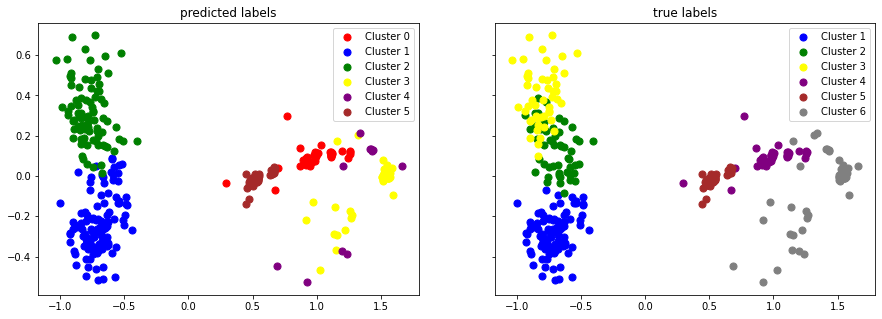

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [ ]:
pca = PCA(n_components=15)
X_reduced = pca.fit_transform(df)[:,[0,3]]

eval_clustering_2D(X_reduced, lab['label'], lab['k_means'])

ari_kmeans = adjusted_rand_score(lab['activite'], lab['k_means'])
nmi_kmeans = normalized_mutual_info_score(lab['activite'], lab['k_means'])
accuracy_kmeans = accuracy(lab['label'], lab['k_means'])

In [ ]:
pd.crosstab(lab['k_means'], lab['activite'])

activite,descendre les escaliers,marcher,monter les escaliers,se lever,s’allonger,s’asseoir
k_means,,,,,,
0,0,0,0,0,0,47
1,0,95,18,0,0,0
2,49,0,35,0,0,0
3,0,0,0,0,39,0
4,0,0,0,0,11,0
5,0,0,0,53,0,0


### **Classification ascendante hiérarchique (CAH)**

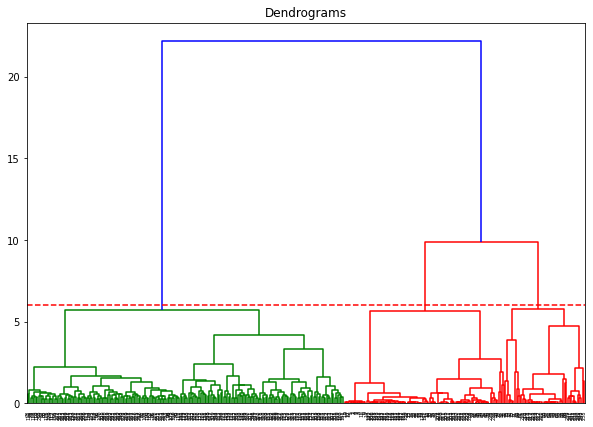

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [ ]:
cah = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
lab['CAH'] = cah.fit_predict(df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)



Accuracy :  0.83
NMI :  0.92
ARI :  0.84


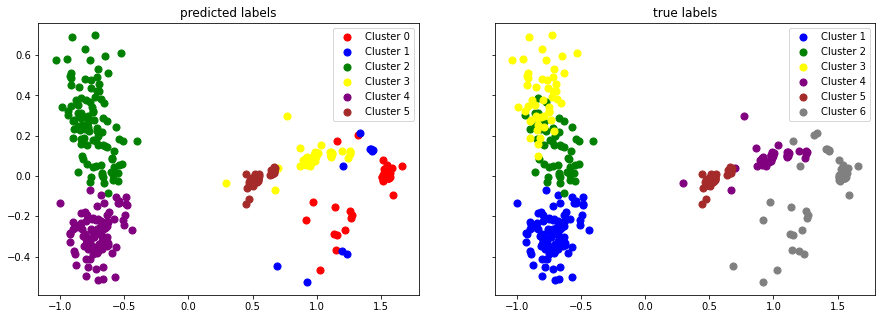

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [ ]:
pca = PCA(n_components=15)
X_reduced = pca.fit_transform(df)[:,[0,3]]

eval_clustering_2D(X_reduced, lab['label'], lab['CAH'])

ari_cah = adjusted_rand_score(lab['activite'], lab['CAH'])
nmi_cah = normalized_mutual_info_score(lab['activite'], lab['CAH'])
accuracy_cah = accuracy(lab['label'], lab['CAH'])

In [ ]:
pd.crosstab(lab['CAH'], lab['activite'])

activite,descendre les escaliers,marcher,monter les escaliers,se lever,s’allonger,s’asseoir
CAH,,,,,,
0,0,0,0,0,40,0
1,0,0,0,0,10,0
2,49,0,53,0,0,0
3,0,0,0,0,0,47
4,0,95,0,0,0,0
5,0,0,0,53,0,0


### **Fuzzy c-means**

In [ ]:
fcm = FCM(n_clusters=6)
fcm.fit(df.to_numpy())
fcm_labels = fcm.predict(df.to_numpy())
lab['fuzzy_c_means'] = fcm_labels

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)



Accuracy :  0.9
NMI :  0.92
ARI :  0.87


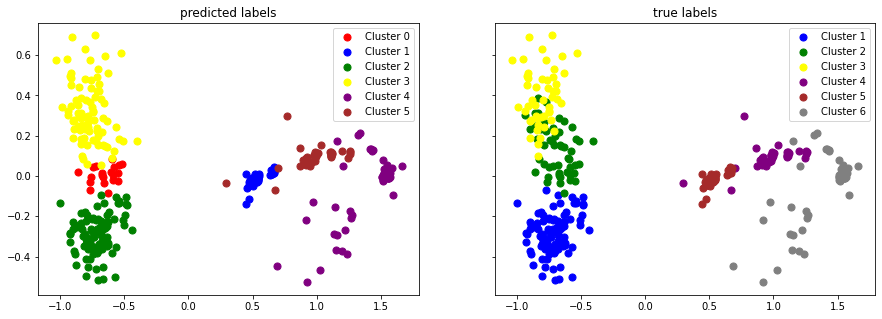

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [ ]:
pca = PCA(n_components=15)
X_reduced = pca.fit_transform(df)[:,[0,3]]

eval_clustering_2D(X_reduced, lab['label'], lab['fuzzy_c_means'])

ari_fuzzycmeans = adjusted_rand_score(lab['activite'], lab['fuzzy_c_means'])
nmi_fuzzycmeans = normalized_mutual_info_score(lab['activite'], lab['fuzzy_c_means'])
accuracy_fuzzycmeans = accuracy(lab['label'], lab['fuzzy_c_means'])

In [ ]:
pd.crosstab(lab['fuzzy_c_means'], lab['activite'])

activite,descendre les escaliers,marcher,monter les escaliers,se lever,s’allonger,s’asseoir
fuzzy_c_means,,,,,,
0,0,1,19,0,0,0
1,0,0,0,53,0,0
2,0,94,0,0,0,0
3,49,0,34,0,0,0
4,0,0,0,0,50,0
5,0,0,0,0,0,47


### **Partitioning Around Medoids (PAM)**

In [ ]:
pam = KMedoids(n_clusters=6, method='pam', random_state=0).fit(df)
lab['PAM'] = pam.labels_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)



Accuracy :  0.97
NMI :  0.94
ARI :  0.93


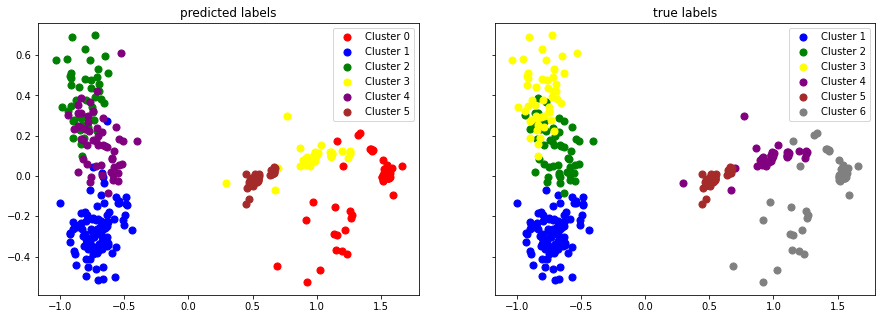

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [ ]:
pca = PCA(n_components=15)
X_reduced = pca.fit_transform(df)[:,[0,3]]

eval_clustering_2D(X_reduced, lab['label'], lab['PAM'])

ari_pam = adjusted_rand_score(lab['activite'], lab['PAM'])
nmi_pam = normalized_mutual_info_score(lab['activite'], lab['PAM'])
accuracy_pam = accuracy(lab['label'], lab['PAM'])

In [ ]:
pd.crosstab(lab['PAM'], lab['activite'])

activite,descendre les escaliers,marcher,monter les escaliers,se lever,s’allonger,s’asseoir
PAM,,,,,,
0,0,0,0,0,50,0
1,0,95,5,0,0,0
2,44,0,0,0,0,0
3,0,0,0,0,0,47
4,5,0,48,0,0,0
5,0,0,0,53,0,0


# **Comparaison des résultats**

In [ ]:
col_names = ["Accuracy", "NMI", "ARI"]
row_names = ["K-means", "CAH", "Fuzzy c-means", "PAM"]

list_accuracy = [accuracy_kmeans, accuracy_cah, accuracy_fuzzycmeans, accuracy_pam]
list_nmi = [nmi_kmeans, nmi_cah, nmi_fuzzycmeans, nmi_pam]
list_ari = [ari_kmeans, ari_cah, ari_fuzzycmeans, ari_pam]

result = pd.DataFrame(columns=col_names, index=row_names)

for i in range(len(row_names)):
  result.loc[row_names[i], col_names[0]] = list_accuracy[i]
  result.loc[row_names[i], col_names[1]] = list_nmi[i]
  result.loc[row_names[i], col_names[2]] = list_ari[i]


print("Résultat \n")
print(tabulate(result, result.columns, tablefmt="grid"))

Résultat 

+---------------+------------+----------+----------+
|               |   Accuracy |      NMI |      ARI |
+===============+============+==========+==========+
| K-means       |   0.815562 | 0.857548 | 0.765381 |
+---------------+------------+----------+----------+
| CAH           |   0.829971 | 0.91842  | 0.842289 |
+---------------+------------+----------+----------+
| Fuzzy c-means |   0.899135 | 0.916299 | 0.86674  |
+---------------+------------+----------+----------+
| PAM           |   0.971182 | 0.943077 | 0.933816 |
+---------------+------------+----------+----------+


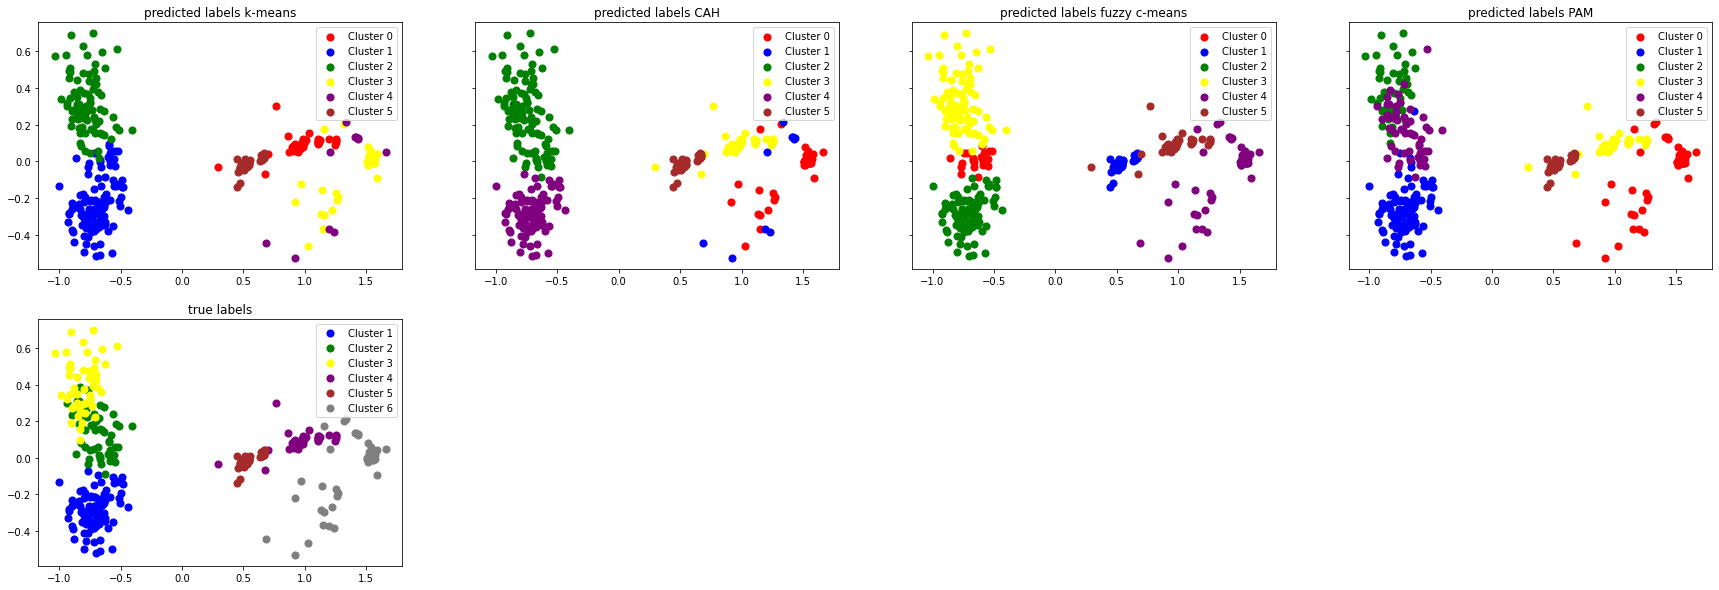

In [ ]:
color = ['red', 'blue', 'green', 'yellow', 'purple', 'brown', 'gray', 'pink', 'black']

fig, axes = plt.subplots(2, 4, figsize=(30,10), sharey='row')


for i in set(lab['k_means'].tolist()):
  axes[0][0].scatter(X_reduced[lab['k_means']== i, 0], X_reduced[lab['k_means'] == i, 1], s = 50, c = color[i], label = 'Cluster ' + str(i))
axes[0][0].set_title("predicted labels k-means")
axes[0][0].legend()

for i in set(lab['CAH'].tolist()):
  axes[0][1].scatter(X_reduced[lab['CAH']== i, 0], X_reduced[lab['CAH'] == i, 1], s = 50, c = color[i], label = 'Cluster ' + str(i))
axes[0][1].set_title("predicted labels CAH")
axes[0][1].legend()

for i in set(lab['fuzzy_c_means'].tolist()):
  axes[0][2].scatter(X_reduced[lab['fuzzy_c_means']== i, 0], X_reduced[lab['fuzzy_c_means'] == i, 1], s = 50, c = color[i], label = 'Cluster ' + str(i))
axes[0][2].set_title("predicted labels fuzzy c-means")
axes[0][2].legend()

for i in set(lab['PAM'].tolist()):
  axes[0][3].scatter(X_reduced[lab['PAM']== i, 0], X_reduced[lab['PAM'] == i, 1], s = 50, c = color[i], label = 'Cluster ' + str(i))
axes[0][3].set_title("predicted labels PAM")
axes[0][3].legend()

for i in set(lab['label'].tolist()):
  axes[1][0].scatter(X_reduced[lab['label'] == i, 0], X_reduced[lab['label'] == i, 1], s = 50, c = color[i], label = 'Cluster ' + str(i))
axes[1][0].set_title("true labels")
axes[1][0].legend()


fig.delaxes(axes[1][1])
fig.delaxes(axes[1][2])
fig.delaxes(axes[1][3])

plt.show()